# Implementation of logistic regression in python using sklearn

For this example, we will be working with the [Titanic Data Set](https://www.kaggle.com/c/titanic) from Kaggle.This is a very famous data set and very often is a student’s first step in machine learning!

We’ll be trying to predict a **classification- survival or deceased**.

Let’s begin our understanding of implementing `Logistic Regression` in Python for classification.

### Initial script

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Let’s start by reading in the titanic_data file into a pandas data frame.

path = os.getcwd()
for i in range(3):
    path = os.path.dirname(path)
data = pd.read_excel( path + '/Datasets/Titanic_Dataset.xlsx')

In [4]:
data.head(10)

,Passengerid,Age,Fare,Sex,sibsp,Parch,zero,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,0,3,2,0
1,2,38.0,71.2833,1,1,0,0,1,0,1
2,3,26.0,7.9250,1,0,0,0,3,2,1
3,4,35.0,53.1000,1,1,0,0,1,2,1
4,5,35.0,8.0500,0,0,0,0,3,2,0
5,6,28.0,8.4583,0,0,0,0,3,1,0
6,7,54.0,51.8625,0,0,0,0,1,2,0
7,8,2.0,21.0750,0,3,1,0,3,2,0
8,9,27.0,11.1333,1,0,2,0,3,2,1
9,10,14.0,30.0708,1,1,0,0,2,0,1


Here’s the Data Dictionary, so we can understand the columns info better:

- PassengerID-type should be integers
- Survived-survived or not
- Pclass-class of Travel of every passenger
- Sex -gender
- Age-age of passengers
- SibSp -No. of siblings/spouse aboard
- Parch-No. of parent/child aboard
- Fare -what Prices they paid
- Embarked-the port in which a passenger has embarked.

In [5]:
data.count()

Passengerid    1309
Age            1309
Fare           1309
Sex            1309
sibsp          1309
Parch          1309
zero           1309
Pclass         1309
Embarked       1309
Survived       1309
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Passengerid    1309 non-null int64
Age            1309 non-null float64
Fare           1309 non-null float64
Sex            1309 non-null int64
sibsp          1309 non-null int64
Parch          1309 non-null int64
zero           1309 non-null int64
Pclass         1309 non-null int64
Embarked       1309 non-null int64
Survived       1309 non-null int64
dtypes: float64(2), int64(8)
memory usage: 102.3 KB


### Missing Data

We can use `seaborn` to create a simple `heatmap` to see where we are missing data!

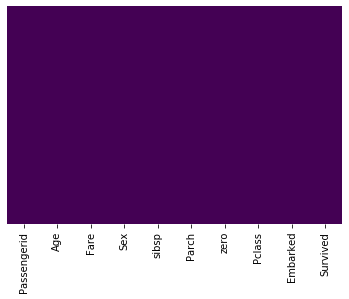

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

So, we can see that there are no missing data in our dataset.

### Data visualizations

Now in this project I have used Seaborn library for data viz. 

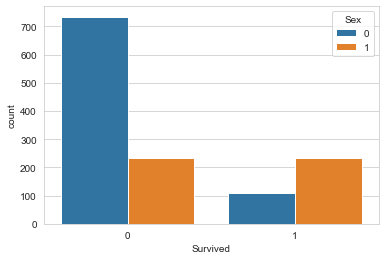

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=data)

after looking at this graph we can tell that the people who did not survive were much more likely to be `male` and people who did survive were almost like twice as likely to be `female`.

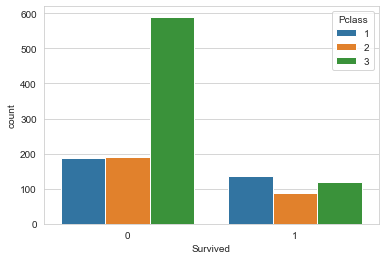

In [9]:
# no. of people survived according to their Passanger class

sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=data)

after looking at this we can tell that people who did not survive were more likely to be belonging to third class i.e the `lowest class`, the cheapest to get on to and people who did survive were more towards belonging to `higher` classes.

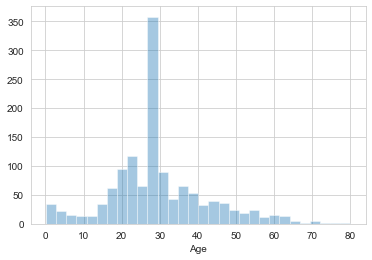

In [10]:
# distribution plot of the age of people

sns.distplot(data['Age'].dropna(), kde=False, bins=30)

The average age group of people to survive is somewhere between **20 to 30**and as older you get lesser chances of you to have on board.

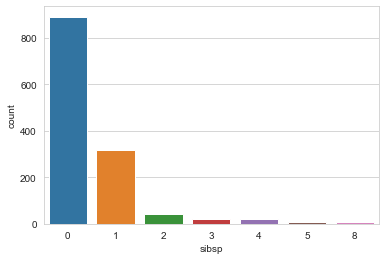

In [11]:
# countplot of the people having siblings

sns.countplot(x='sibsp', data=data)

looking at this plot we can directly tell that most people on board did **not** have either **children, siblings or spouse** on board and the second most popular option is **1**bwhich is more likely to be **spouse**. We have a lot of **single** people on board, they don’t have **spouse or children**.

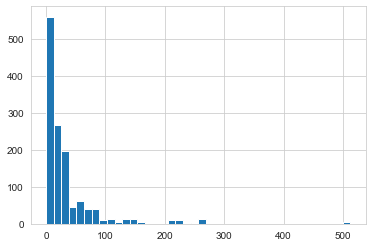

In [12]:
# distribution plot of the ticket Fare

data['Fare'].hist(bins=40)

It looks like most of the purchase prices are between **0 and50**, which actually makes sense tickets are more distributed towards **cheaper fare** prices because most passengers are in cheaper third class

### Building a logistic model

Let’s start by splitting our data into a training set and test set.

In [13]:
from sklearn.model_selection import train_test_split

all_inputs = data

X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1), data['Survived'], train_size=0.7, random_state=1)


- Here y is the actual data which we are going to predict, everything else is going to be the features(x).
- Set the text size to 30 percent and you don’t actually have to set your random state but this is put so if you want your result to match mines exactly.
- We will use train_test_split from the cross_validation module to split our data. 70%of the data will be training data and %30 will be testing data.

### Training and Predicting

In [26]:
from sklearn.linear_model import LogisticRegression

log_regressor = LogisticRegression(solver = 'lbfgs',max_iter = 500)
log_regressor.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
parameters = log_regressor.coef_

In [28]:
parameters

array([[-3.06934276e-03, -4.19184843e-02,  5.06639754e-04,
         2.34422948e+00, -3.95420954e-01,  6.14585444e-02,
         0.00000000e+00, -1.06108967e+00, -4.44420394e-02]])

In [29]:
predictions = log_regressor.predict(X_test)

In [30]:
predictions

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Model Evaluation

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       277
           1       0.75      0.47      0.58       116

    accuracy                           0.80       393
   macro avg       0.78      0.70      0.72       393
weighted avg       0.79      0.80      0.78       393



We got **80%** accuracy which is not bad at all.

Let us now see the **confusion matrix:**

To evaluate our model for some specific values, it can be directly done from our confusion matrix.

In [32]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test,predictions)
print(cnf_matrix)

[[259  18]
 [ 61  55]]


From our confusion matrix we conclude that:
- True positive: 260(We predicted a positive result and it was positive)
- True negative: 54(We predicted a negative result and it was negative)
- False positive: 17(We predicted a positive result and it was negative)
- False negative: 62(We predicted a negative result and it was positive)

##### Accuracy = (TP+TN)/total
**Accuracy = ((259+55)/393)*100 = 80%**

**Error Rate = (FP+FN)/total
Error rate = ((61+18)/393)*100 = 20%**

Text(0.5, 257.44, 'Predicted label')

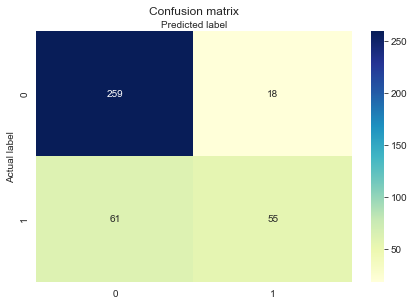

In [36]:
# plot heatmap for confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
#Let's evaluate the model using model evaluation metrics such as accuracy,
#precision, and recall.
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.7989821882951654
Precision: 0.7534246575342466
Recall: 0.47413793103448276


### ROC curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

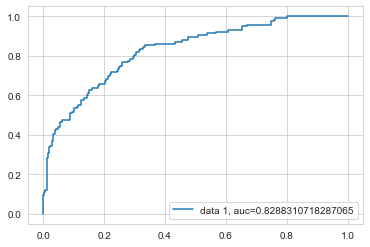

In [38]:
y_pred_proba = log_regressor.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.83. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.